Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

## Differentiation options

1. Numerical differentiation
2. Symbolic differentiation
3. Automatic differentiation

    1. Forward mode differentiation
    2. Reverse mode differentiation

### 1. Numerical differentiation

### 2. Symbolic differentiation


### 3. Automatic differentiation

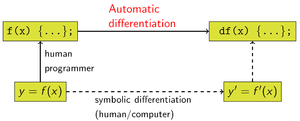

#### 3.A Forward mode 
Example:
$$ z = f(x_1, x_2) = x_1 x_2 + \sin(x_1)$$

#### 3.B Reverse mode

Example:
$$ z = f(x_1, x_2) = x_1 x_2 + \sin(x_1)$$

In [ ]:
import numpy as np
class ForwardDiff:
    def __init__(self, value, grad=None):
        self.value = value
        self.grad = np.zeros_like(value) if grad is None else grad
        
    
    def __add__(self, other):
        cls = type(self)
        other = other if isinstance(other, cls) else cls(other)
        out = cls(self.value + other.value, 
                    self.grad + other.grad)
        return out
    __radd__ = __add__
    
    def __repr__(self):
        return f"{self.__class__.__name__}(data={self.value}, grad={self.grad})"
x = ForwardDiff(2, 1)
y = ForwardDiff(3, 0)

f = x + y 
f

In [ ]:
oldFD = ForwardDiff # Bad practice: do not do it
class ForwardDiff(oldFD):
    def __mul__(self, other):
        cls = type(self)
        other = other if isinstance(other, cls) else cls(other)
        out = cls(self.value * other.value, 
                    other.value * self.grad+ 
                     self.value * other.grad)
        return out
    
    __rmul__ = __mul__
    
x = ForwardDiff(2, 0)
y = ForwardDiff(3, 1)

f1 = x * y
f2 = 2*x + 3*y + x*y
f1, f2

In [ ]:
oldFD = ForwardDiff # Bad practice: do not do it
class ForwardDiff(oldFD):
    def log(self):
        cls = type(self)
        return cls(np.log(self.value),
                     1/self.value * self.grad)
    def exp(self):
        cls = type(self)
        out_val = np.exp(self.value)
        return cls(out_val,
                     out_val * self.grad)
    
    def sin(self):
        cls = type(self)
        return cls(np.sin(self.value),
                     np.cos(self.value) * self.grad)
    
    def cos(self):
        cls = type(self)
        return cls(np.cos(self.value),
                    -np.sin(self.value) * self.grad)
    
    def __pow__(self, other):
        cls = type(self)
        other = other if isinstance(other, cls) else cls(other)
        return (self.log() * other).exp()

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    

x = ForwardDiff(2, 1)
y = ForwardDiff(3, 0)

f = x**y
f

In [ ]:
import numpy as np
def add_vjp(a, b, grad):
    return grad, grad


def no_parents_vjp(grad):
    return (grad,)

class ReverseDiff:
    def __init__(self, value, parents=(), op='', vjp=no_parents_vjp):
        self.value = value
        self.parents = parents
        self.op = op
        self.vjp = vjp
        self.grad = None

    def backward(self, grad):
        self.grad = grad
        op_args = [p.value for p in self.parents]
        grads = self.vjp(*op_args, grad)
        for g, p in zip(grads, self.parents):
            p.backward(g)
    
    def __add__(self, other):
        cls = type(self)
        other = other if isinstance(other, cls) else cls(other)
        out = cls(self.value + other.value, 
                  parents=(self, other),
                  op='+',
                  vjp=add_vjp)
        return out
    
    __radd__ = __add__
    
    def __repr__(self):
        cls = type(self)
        return f"{cls.__name__}(value={self.value}, parents={self.parents}, op={self.op}, grad={self.grad})"
    
x = ReverseDiff(2)
y = ReverseDiff(3)

f = x + y + 3
f.backward(1)
f
x.grad, y.grad

In [ ]:
oldRD = ReverseDiff # Bad practice: do not do it

def mul_vjp(a, b, grad):
    return grad * b, grad * a

class ReverseDiff(oldRD):
    def __mul__(self, other):
        cls = type(self)
        other = other if isinstance(other, cls) else cls(other)
        out = cls(self.value * other.value,
                 parents=(self, other),
                 op='*',
                 vjp=mul_vjp)
        return out
    
    __rmul__ = __mul__
    
x = ReverseDiff(2)
y = ReverseDiff(3)

f1 = 5*x + 7* y
f1.backward(1)
x.grad, y.grad

In [ ]:
f2 = x*y
f2.backward(1)
x.grad, y.grad